In [1]:
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# This is needed to be able to import the libraries from the top level of the project
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.market_data_provider.finnhub import FinnhubDataProvider

finnhub = FinnhubDataProvider()

stock = "TSLA"
df = finnhub.get_minute_candles(stock, "2020-06-07", "2020-06-10")
df

Getting minute candles on Finnhub api
Sending GET request: https://finnhub.io/api/v1/stock/candle?token=btp1onn48v6pbh1esoig&symbol=TSLA&resolution=1&format=json&from=1591484400&to=1591743600&adjusted=true


,Open,High,Low,Close,Volume
datetime,,,,,
2020-06-08 09:00:00,880.00,880.00,880.00,880.00,355
2020-06-08 09:01:00,881.50,881.50,881.50,881.50,223
2020-06-08 09:02:00,882.00,882.00,882.00,882.00,409
2020-06-08 09:06:00,881.10,881.10,881.10,881.10,193
2020-06-08 09:17:00,879.00,879.00,879.00,879.00,442
...,...,...,...,...,...
2020-06-09 23:46:00,939.57,939.57,939.57,939.57,372
2020-06-09 23:48:00,939.57,939.57,939.57,939.57,684
2020-06-09 23:49:00,939.97,939.97,939.97,939.97,394


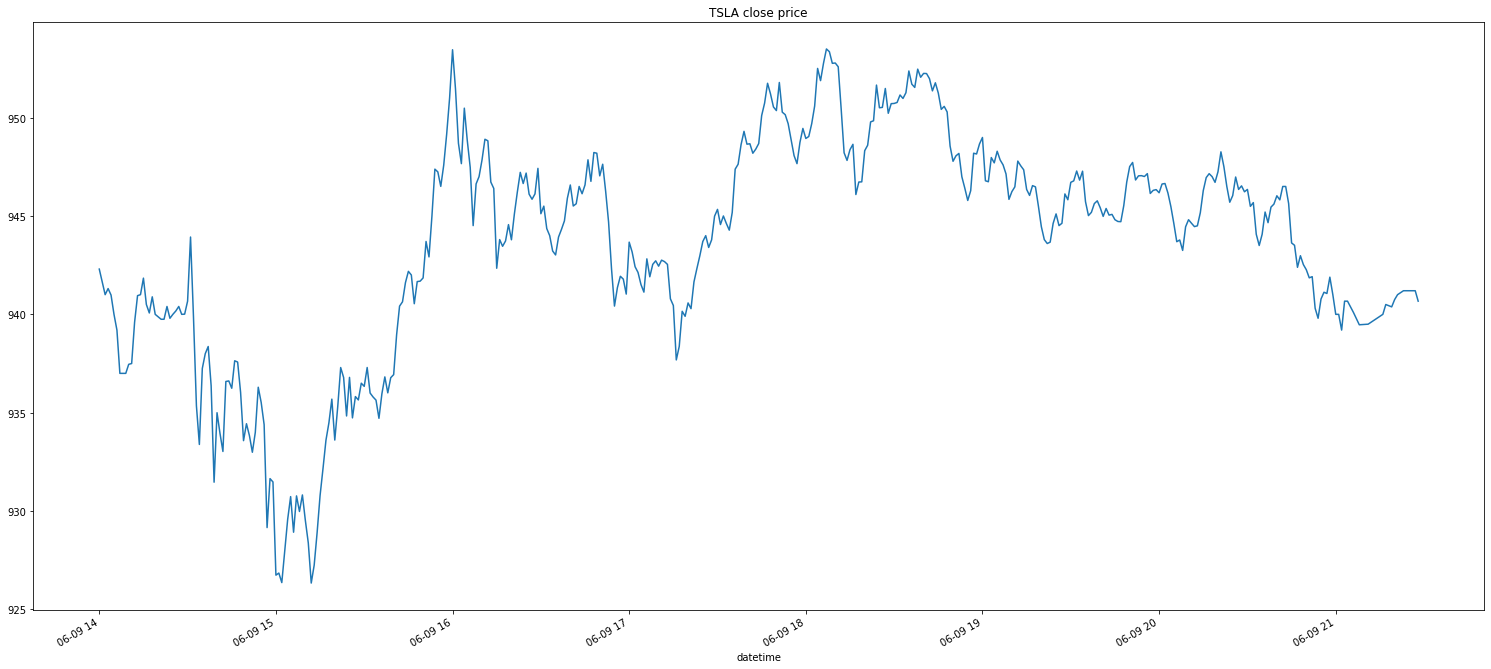

In [2]:



close = df["Close"]
df['slow_ma'] = close.rolling(window=9).mean()
df['med_ma'] = close.rolling(window=41).mean()
df['fast_ma'] = close.rolling(window=149).mean()
sub_df = df[df.index.day == 9].between_time("14:00", "21:30")


sub_df['Close'].between_time("14:00", "21:30").plot(title=stock + " close price", figsize=(26,12))
# sub_df['slow_ma'].between_time("14:00", "21:30").plot()
# sub_df['fast_ma'].between_time("14:00", "21:30").plot()
# sub_df['med_ma'].between_time("14:00", "21:30").plot()
# plt.legend([
#     'close',
#     '20 SMA', 
#     '50 SMA', 
#     '200 SMA'
#     ])
# plt.axvline(pd.Timestamp('2020-06-09 14:30'),color='black', linestyle=':')
# plt.axvline(pd.Timestamp('2020-06-09 21:00'),color='black', linestyle=':')



# plt.grid()
# plt.show()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


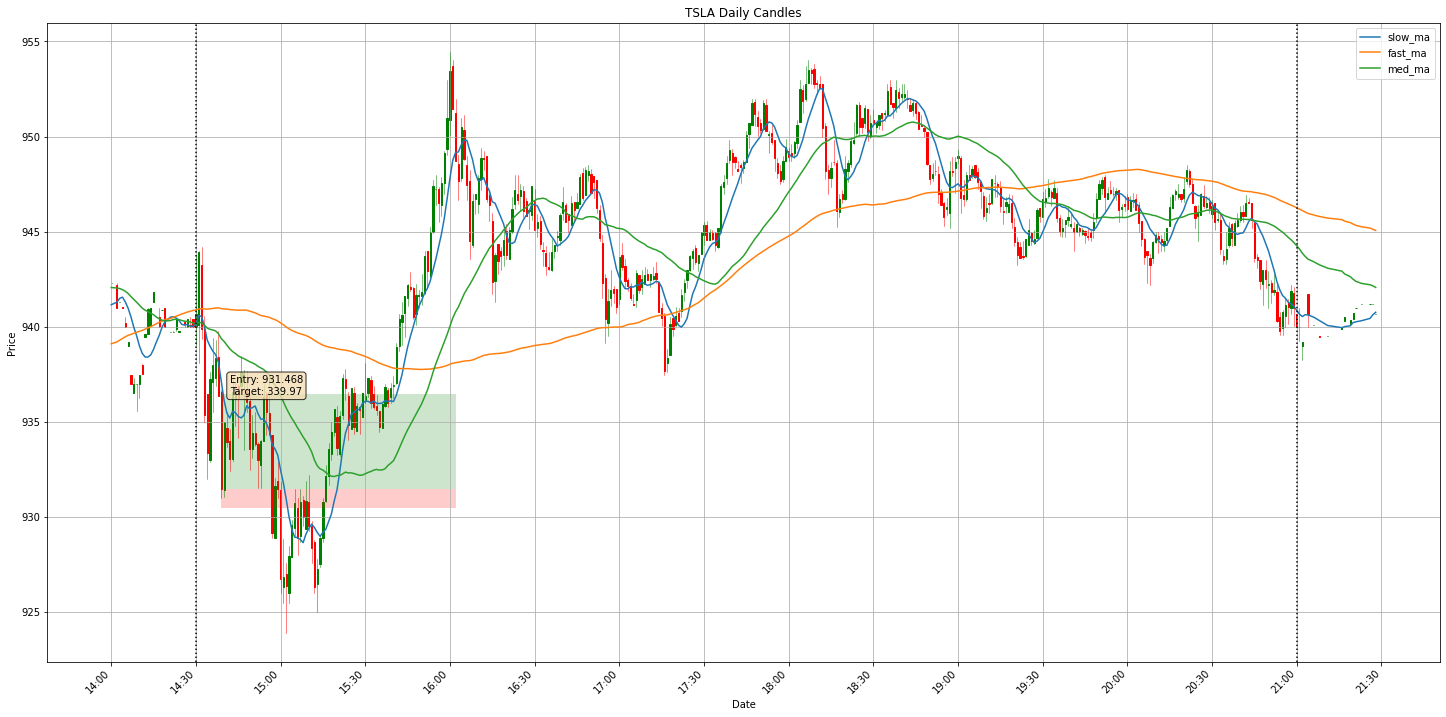

In [3]:
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import matplotlib.patches as patches
from matplotlib.dates import DateFormatter
from matplotlib.patches import Rectangle
from mplfinance.original_flavor import candlestick_ohlc


reward_ratio = 5
risk_ratio = 1

print(type(sub_df.index))
sub_df['date'] = [mdates.date2num(d) for d in sub_df.index]
sub_df.reset_index()
quotes = [tuple(x) for x in sub_df[['date', 'Open', 'High', 'Low', 'Close']].values]
fig, ax = plt.subplots(figsize=(20, 10))
candlestick_ohlc(ax, quotes, colorup='g',width=0.0003, alpha=1)
sub_df['slow_ma'].between_time("14:00", "21:30").plot()
sub_df['fast_ma'].between_time("14:00", "21:30").plot()
sub_df['med_ma'].between_time("14:00", "21:30").plot()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

# Add a position visual
ax.add_patch(Rectangle((sub_df['date'][37], sub_df['Close'][37]), sub_df['date'][120] - sub_df['date'][37], reward_ratio, facecolor="green", alpha=0.2))
ax.add_patch(Rectangle((sub_df['date'][37], sub_df['Close'][37]), sub_df['date'][120] - sub_df['date'][37], -risk_ratio, facecolor="red", alpha=0.2))


# Add a text box
# https://matplotlib.org/3.1.1/gallery/recipes/placing_text_boxes.html
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
message = '\n'.join(("Entry: " + str(sub_df['Close'][37]),
                    "Target: " + str(339.97)))
ax.text(sub_df['date'][40], sub_df['Close'][37] + reward_ratio + 1, message, fontsize=10,
        verticalalignment='top', bbox=props)

# Adding open/close market lines
plt.axvline(pd.Timestamp('2020-06-09 14:30'),color='black', linestyle=':')
plt.axvline(pd.Timestamp('2020-06-09 21:00'),color='black', linestyle=':')


# Changing grid settings
# http://jonathansoma.com/lede/data-studio/matplotlib/adding-grid-lines-to-a-matplotlib-chart/

# locx = plticker.MultipleLocator(base=intervals)
# locy = plticker.MultipleLocator(base=1)
# ax.xaxis.set_major_locator(locx)
# ax.yaxis.set_major_locator(locy)
# ax.grid(which='major', axis='x', linestyle='-')
# ax.grid(which='major', axis='y', linestyle='-')


# https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[00, 30]))
ax.set_title(stock + " Daily Candles")
ax.grid(b=True)

#ax.set_facecolor('xkcd:grey')

plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

#currentAxis = plt.gca()

plt.show()

In [4]:
sub_df.head

<bound method NDFrame.head of                        Open      High     Low   Close  Volume     slow_ma  \
datetime                                                                    
2020-06-09 14:00:00  942.30  942.3000  942.30  942.30    1081  941.161722   
2020-06-09 14:02:00  942.20  942.3000  941.00  941.00    2005  941.293944   
2020-06-09 14:03:00  941.31  941.3100  941.31  941.31     873  941.495056   
2020-06-09 14:04:00  941.03  941.0500  940.98  940.98    1432  941.559500   
2020-06-09 14:05:00  940.21  940.4999  940.00  940.00    1867  941.303944   
...                     ...       ...     ...     ...     ...         ...   
2020-06-09 21:21:00  941.00  941.0000  941.00  941.00     264  940.263333   
2020-06-09 21:23:00  941.20  941.2000  941.20  941.20     382  940.322222   
2020-06-09 21:26:00  941.20  941.2000  941.20  941.20     437  940.444444   
2020-06-09 21:27:00  941.20  941.2000  941.20  941.20     637  940.636667   
2020-06-09 21:28:00  940.67  940.6700  940.67 

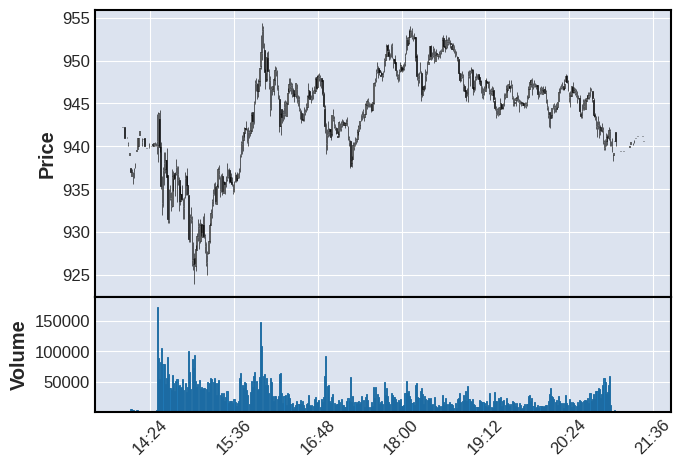

In [5]:
import mplfinance as mpf
mpf.plot(sub_df,type='candle',volume=True,show_nontrading=True)

In [6]:
'''
This file contains a animation demo using mplfinance "external axes mode",
in which animate both the display of candlesticks as well as the display
of MACD (Moving Average Convergence Divergence) visual analysis.
In this example, instead of creating the Figure and Axes external to mplfiance,
we allow mplfinance to create the Figure and Axes using its "panel method", and
set kwarg `returnfig=True` so that mplfinance will return the Figure and Axes.
We then take those Axes and pass them back into mplfinance ("external axes mode")
as part of the animation.
Note that presently mplfinance does not support "blitting" (blitting makes animation
more efficient).  Nonetheless, the animation is efficient enough to update at least
once per second, and typically more frequently depending on the size of the plot.
'''
import pandas as pd
import mplfinance as mpf
import matplotlib.animation as animation

mpf.__version__

idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)
df = idf.loc['2011-07-01':'2011-12-30',:]


# =======
#  MACD:

df = df.iloc[0:30]

exp12     = df['Close'].ewm(span=12, adjust=False).mean()
exp26     = df['Close'].ewm(span=26, adjust=False).mean()
macd      = exp12 - exp26
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

s = mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'})

fig, axes = mpf.plot(df,type='candle',addplot=apds,figscale=1.5,figratio=(7,5),title='\n\nMACD',
                     style=s,volume=True,volume_panel=2,panel_ratios=(6,3,2),returnfig=True)

ax_main = axes[0]
ax_emav = ax_main
ax_hisg = axes[2]
ax_macd = axes[3]
ax_sign = ax_macd
ax_volu = axes[4]

df =  idf.loc['2011-07-01':'2011-12-30',:]

def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(30+ival)]
    exp12     = data['Close'].ewm(span=12, adjust=False).mean()
    exp26     = data['Close'].ewm(span=26, adjust=False).mean()
    macd      = exp12 - exp26
    signal    = macd.ewm(span=9, adjust=False).mean()
    histogram = macd - signal
    apds = [mpf.make_addplot(exp12,color='lime',ax=ax_emav),
            mpf.make_addplot(exp26,color='c',ax=ax_emav),
            mpf.make_addplot(histogram,type='bar',width=0.7,
                             color='dimgray',alpha=1,ax=ax_hisg),
            mpf.make_addplot(macd,color='fuchsia',ax=ax_macd),
            mpf.make_addplot(signal,color='b',ax=ax_sign),
           ]

    for ax in axes:
        ax.clear()
    mpf.plot(data,type='candle',addplot=apds,ax=ax_main,volume=ax_volu)

ani = animation.FuncAnimation(fig,animate,interval=100)

mpf.show()

FileNotFoundError: [Errno 2] File data/SPY_20110701_20120630_Bollinger.csv does not exist: 'data/SPY_20110701_20120630_Bollinger.csv'